In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
ds=pd.read_csv('sensor.csv')
ds=ds.drop(['timestamp','Unnamed: 0','sensor_15'],axis=1)

In [51]:

ds.replace([np.inf, -np.inf], np.nan, inplace=True) 
ds=ds.fillna(ds.mean())
ds.shape
x=ds.iloc[:,0:51].values

ds['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [65]:
#label_encoder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
ds['machine_status']= label_encoder.fit_transform(ds['machine_status']) 
y=ds.iloc[:,-1].values
print(y,len(y))

[1 1 1 ... 1 1 1] 220320


In [53]:
#splitting data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [55]:
#logistic regression
from sklearn.linear_model import LogisticRegression
c= LogisticRegression(random_state=0)
c.fit(xtrain,ytrain)

C:\Users\sriha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [80]:
#prediction
ypred=c.predict(xtest)
print(ypred)
print(len(ytest))

[1 1 1 ... 2 1 1]
55080


In [76]:
from sklearn.metrics import accuracy_score
b= accuracy_score(ytest,ypred)
print("Accuracy of the model = ",b*100,"%")
a= accuracy_score(ytest,ypred, normalize= False)
print(a)

Accuracy of the model =  99.55882352941177 %
54837


In [3]:
pd.set_option('display.max_columns',55)

In [4]:
pd.set_option('display.max_rows',1500)

In [5]:
data = pd.read_csv('sensor.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

There are many null objects in many features, sensor_15 is completely null

In [7]:
del data['Unnamed: 0']

In [8]:
data.head(15)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
5,2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,15.16204,39.29406,49.37051,32.23816,1.673484,418.9049,NaN,461.8948,461.9289,2.507935,663.4962,398.6428,872.4973,498.4064,974.6847,624.3462,739.2036,846.4617,429.6945,777.2820,700.7193,623.1481,734.3750,711.2128,438.6517,162.8758,333.7975,196.4579,90.84048,42.70833,31.77083,79.94791,30.989580,31.250000,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL
6,2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,15.65393,15.08247,38.29974,49.57146,32.00982,1.684984,420.3324,NaN,464.2402,467.5146,2.598702,667.4751,401.1847,882.7164,500.4944,981.2908,631.2756,740.9517,853.9647,458.3623,771.8188,722.5254,674.0740,707.8125,716.1951,433.5065,161.9678,330.3747,194.0652,89.23161,42.70833,32.29166,79.94791,31.250000,31.510420,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1

In [9]:
data.index = data['timestamp']

In [10]:
data.index = pd.to_datetime(data.index)

In [11]:
del data['timestamp']

In [12]:
data.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,0.0,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,NaN,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,NaN,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,NaN,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,NaN,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,47.463760,49.656540,

We can see that different sensors have different scales

In [13]:
corr  = data.corr()

[Text(0.5, 0, 'sensor_00'),
 Text(2.5, 0, 'sensor_02'),
 Text(4.5, 0, 'sensor_04'),
 Text(6.5, 0, 'sensor_06'),
 Text(8.5, 0, 'sensor_08'),
 Text(10.5, 0, 'sensor_10'),
 Text(12.5, 0, 'sensor_12'),
 Text(14.5, 0, 'sensor_14'),
 Text(16.5, 0, 'sensor_16'),
 Text(18.5, 0, 'sensor_18'),
 Text(20.5, 0, 'sensor_20'),
 Text(22.5, 0, 'sensor_22'),
 Text(24.5, 0, 'sensor_24'),
 Text(26.5, 0, 'sensor_26'),
 Text(28.5, 0, 'sensor_28'),
 Text(30.5, 0, 'sensor_30'),
 Text(32.5, 0, 'sensor_32'),
 Text(34.5, 0, 'sensor_34'),
 Text(36.5, 0, 'sensor_36'),
 Text(38.5, 0, 'sensor_38'),
 Text(40.5, 0, 'sensor_40'),
 Text(42.5, 0, 'sensor_42'),
 Text(44.5, 0, 'sensor_44'),
 Text(46.5, 0, 'sensor_46'),
 Text(48.5, 0, 'sensor_48'),
 Text(50.5, 0, 'sensor_50')]

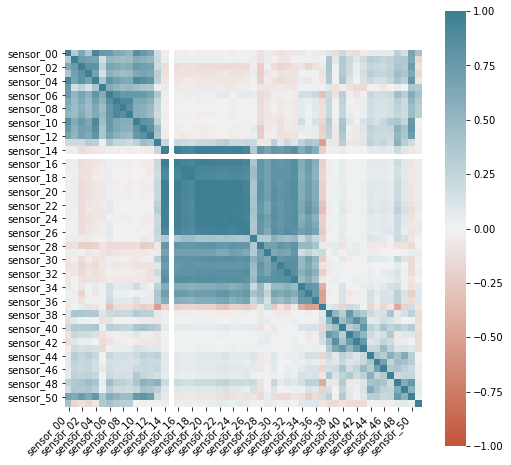

In [14]:
fig, ax = plt.subplots(figsize=(8,8))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Based on correlation, there are three sets of clusters
Basically what it means is some sensors of 0 to 14 have high correlations with each other
Sensors 14 to 36 have high correlation with each other
and then Sensors 38 to 41 have correlations with each other
but there is not significant correlation between these clusters of Sensors

In [15]:
data['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

There are 3 unique label values, namely: NORMAL, BROKEN and RECOVERING

In [16]:
data[(data['machine_status'] == 'BROKEN')]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,35.530850,3.625588,1.602259,0.237091,407.4979,NaN,451.3286,449.1867,2.387357,652.2382,390.5987,858.3630,461.2751,955.74270,614.6786,653.9383,753.0676,570.81680,1161.1310,783.6125,710.6481,960.9374,742.2943,566.6204,261.7709,399.129100,301.1411,114.20790,52.08333,35.41666,87.23958,39.583330,36.979160,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.6528,BROKEN
2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,28.304880,30.434710,21.437910,6.803444,420.0946,NaN,460.7847,457.7386,2.481055,664.2351,398.1912,879.1428,458.3324,944.30770,625.1230,650.4600,748.0622,502.59550,1063.0030,784.2626,671.2963,1016.6670,828.1685,578.9925,177.4708,411.165200,434.2556,73.31284,37.76041,32.81250,71.61458,28.645830,29.947916,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.7384,BROKEN
2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,43.998860,43.623220,22.736040,9.277993,420.3359,NaN,463.0843,462.6495,2.539193,665.5446,399.1660,880.9252,498.6224,997.63640,619.0558,719.8438,867.5176,551.63670,1154.4050,761.1199,655.5555,1024.4790,849.8132,608.9143,171.3203,350.311700,285.3491,75.20248,47.39583,29.16667,66.66666,32.291660,31.250000,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.5231,BROKEN
2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,27.092980,44.793620,32.745590,2.178048,420.7917,NaN,463.3876,464.5768,2.557975,665.4158,399.1982,885.1603,533.6134,982.50690,627.0386,746.0360,854.0722,478.34040,1095.9630,724.8124,698.6111,971.8749,882.1304,499.8158,171.7490,354.075700,250.9113,72.70645,381.77080,417.18750,427.34370,212.760400,176.822900,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.3611,BROKEN
2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,2.002474,1.960537,0.000000,0.000000,197.9393,NaN,206.4634,193.7957,0.444666,108.9490,125.4787,158.0601,128.2272,96.38937,103.7937,143.1029,156.3189,21.31752,258.0632,109.4662,297.2222,575.0000,436.2560,258.6194,343.9342,694.479126,367.8615,23.78439,28.38542,22.13542,36.71875,23.177082,24.739580,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,NaN,BROKEN
2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,25.977650,23.970270,19.995600,11.076400,421.6618,NaN,464.8507,470.9483,2.632338,669.1102,399.5446,880.8264,536.3282,1091.49300,628.2361,759.8998,946.8455,509.98580,1042.8290,562.6080,668.9814,1037.5000,947.3692,517.4770,287.9145,575.356500,616.8983,30.04753,48.69791,31.51042,39.32291,35.416660,32.812500,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.7685,BROKEN
2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,36.717480,50.046190,30.742880,12.217860,420.8600,NaN,463.5181,455.2702,2.468381,665.9402,399.0930,880.8410,531.8727,1093.57900,626.4651,740.6738,981.4561,490.77280,1023.1660,551.2756,703.70

In [17]:
data[(data['machine_status'] == 'RECOVERING')]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:56:00,0.000000,53.55902,52.777770,43.402775,204.725098,53.74214,3.045428,17.42621,15.740740,16.17477,40.310710,3.730241,1.612210,0.318798,404.9974,NaN,450.2004,454.0266,2.448104,651.1287,390.6628,857.0173,461.6187,951.3060,612.6481,652.3843,750.5814,550.9968,1118.1630,773.6210,704.6296,1003.1250,714.9668,548.0704,270.0769,403.3277,299.2007,110.52630,53.64583,35.41666,84.63541,40.62500,36.979164,49.479160,50.34722,51.21528,49.18982,49.47917,431.7130,133.1019,419.2708,341.7245,RECOVERING
2018-04-12 21:57:00,0.000000,53.55902,52.777770,43.402775,201.137131,52.49996,7.537616,13.53443,9.324364,16.05179,38.930980,3.816472,1.631223,0.342867,409.9810,NaN,447.9742,449.0287,2.410462,650.5953,390.4939,863.1273,458.5190,948.8156,615.3629,646.3538,749.3739,553.7806,1147.2190,783.5280,716.2037,1040.1040,740.6817,561.4838,265.9168,415.0607,305.2495,115.34480,55.20833,35.15625,81.25000,40.88541,36.979160,48.177080,49.76852,50.92593,48.03241,53.81944,451.3889,140.0463,433.1597,466.1458,RECOVERING
2018-04-12 21:58:00,0.000000,52.77777,52.690970,43.402770,204.030655,57.19875,7.609953,16.60880,16.203700,16.09520,33.433750,3.860711,1.622106,0.304665,412.2902,NaN,449.5466,453.7787,2.429593,652.1424,390.2556,857.9081,461.1630,950.7607,614.9879,649.2152,746.4882,541.1052,1131.8090,787.4129,678.2407,976.5624,719.6953,558.5663,266.8813,415.8537,306.2030,105.04380,57.03125,35.15625,79.16666,41.40625,36.718750,46.875000,48.03241,50.34722,47.45370,58.15972,466.4352,144.9653,442.7083,366.0301,RECOVERING
2018-04-12 21:59:00,0.000000,52.60416,52.734370,43.446180,203.567688,50.96181,7.573785,16.70284,16.160300,16.08796,33.132260,4.496508,1.650150,0.606178,408.3951,NaN,450.6098,444.7706,2.361692,652.0457,390.4180,858.0203,460.7399,949.6810,614.2903,649.3373,748.6567,546.8779,1148.8040,782.2913,682.4074,930.2083,723.4662,550.8478,263.7073,403.5153,303.2734,113.03400,57.55208,35.41666,75.26041,42.18750,36.718750,45.833330,47.45370,49.76852,46.58565,63.65741,474.8264,149.0162,449.6528,374.4213,RECOVERING
2018-04-12 22:00:00,NaN,52.51736,52.690970,43.446180,203.567688,49.78948,7.559317,16.56539,16.239870,16.05179,35.345990,12.028980,1.904167,0.589342,411.0616,NaN,449.2088,441.3550,2.311379,650.0242,391.6447,864.0715,459.4494,950.6841,614.7383,649.4260,750.3677,550.1708,1145.0630,780.6435,707.8704,949.9999,720.6281,542.5764,270.2823,410.3059,297.6039,119.86980,55.98958,35.41666,64.84375,44.53125,36.718750,44.270830,46.29630,48.03241,45.13889,75.23148,477.7199,162.6157,448.7847,356.1921,RECOVERING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-25 15:11:00,0.310880,46.48438,51.171870,46.527775,152.526031,60.77931,15.089700,17.62876,18.200230,16.39902,4.347953,0.493511,1.723150,0.000000,420.3740,NaN,458.9563,473.0108,2.655957,665.0773,398.9306,876.3478,534.0463,1088.5370,627.2612,741.9148,981.1793,514.0930,126.5598,598.6487,706.0185,955.7291,1008.2310,553.1983,364.1920,534.5963,838.0055,68.15515,79.94791,78.64583,64.32291,65.36458,54.687500,59.895830,77.83565,73.78472,58.44907,58.15972,295.4283,260.4167,NaN,211.2269,RECOVERING
2018-07-25 15:12:00,0.304977,46.39757,51.085070,46.527770,152.178802,61.24545,15.089700,17.62153,18.243630,16.31944,5.155131,0.008017,1.681504,0.002685,421.0580,NaN,466.

When it is broken, the next minute onwards, the status is considered as recovering until it becomes normal again 

In [18]:
data[(data['machine_status'] == 'RECOVERING')].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14477 entries, 2018-04-12 21:56:00 to 2018-07-25 15:15:00
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sensor_00       4283 non-null   float64
 1   sensor_01       14447 non-null  float64
 2   sensor_02       14472 non-null  float64
 3   sensor_03       14472 non-null  float64
 4   sensor_04       14472 non-null  float64
 5   sensor_05       14472 non-null  float64
 6   sensor_06       9693 non-null   float64
 7   sensor_07       9040 non-null   float64
 8   sensor_08       9384 non-null   float64
 9   sensor_09       9896 non-null   float64
 10  sensor_10       14472 non-null  float64
 11  sensor_11       14472 non-null  float64
 12  sensor_12       14472 non-null  float64
 13  sensor_13       14472 non-null  float64
 14  sensor_14       14477 non-null  float64
 15  sensor_15       0 non-null      float64
 16  sensor_16       14477 non-null  float64
 

When the machine is in recovering status, the following have more NaN values: **sensor00, sensor06, sensor07, sensor08, sensor09, sensor_51** has some NaN values but the number is lot less than than the other sensors

In [19]:
columns = ['sensor_00','sensor_06','sensor_07','sensor_08','sensor_09','sensor_51']

In [20]:
for column in columns:
    print('{0} Original'.format(column))
    display(data[(data['machine_status'] == 'NORMAL')][column].describe())
    print('{0} In Recovery'.format(column))
    display(data[(data['machine_status'] == 'RECOVERING')][column].describe())

sensor_00 Original


count    205822.000000
mean          2.420476
std           0.242472
min           0.000000
25%           2.444734
50%           2.456539
75%           2.499826
max           2.549016
Name: sensor_00, dtype: float64

sensor_00 In Recovery


count    4283.000000
mean        0.055215
std         0.163270
min         0.000000
25%         0.001968
50%         0.001968
75%         0.109201
max         2.318808
Name: sensor_00, dtype: float64

sensor_06 Original


count    205822.000000
mean         13.865073
std           0.864943
min           0.014468
25%          13.382520
50%          13.679110
75%          14.568870
max          15.964990
Name: sensor_06, dtype: float64

sensor_06 In Recovery


count    9693.000000
mean        5.784861
std         5.082390
min         0.014468
25%         0.028935
50%         6.553819
75%        10.098380
max        22.251160
Name: sensor_06, dtype: float64

sensor_07 Original


count    205822.000000
mean         16.165959
std           0.600457
min           0.028935
25%          15.950520
50%          16.167530
75%          16.427950
max          19.133390
Name: sensor_07, dtype: float64

sensor_07 In Recovery


count    9040.000000
mean        8.495140
std         7.110821
min         0.000000
25%         0.036169
50%        11.349830
75%        13.809320
max        23.596640
Name: sensor_07, dtype: float64

sensor_08 Original


count    205822.000000
mean         15.478129
std           0.588606
min           0.028935
25%          15.183740
50%          15.494790
75%          15.697340
max          19.538480
Name: sensor_08, dtype: float64

sensor_08 In Recovery


count    9384.000000
mean        9.117674
std         6.991981
min         0.028935
25%         0.028935
50%        11.140050
75%        12.745950
max        24.348960
Name: sensor_08, dtype: float64

sensor_09 Original


count    205822.000000
mean         15.086662
std           0.572969
min           0.007234
25%          15.053530
50%          15.082470
75%          15.118630
max          18.988710
Name: sensor_09, dtype: float64

sensor_09 In Recovery


count    9896.000000
mean        8.822057
std         7.149103
min         0.000000
25%         0.007234
50%        11.291960
75%        15.053530
max        25.000000
Name: sensor_09, dtype: float64

sensor_51 Original


count    193452.000000
mean        200.720874
std          62.304341
min          30.960648
25%         181.423600
50%         198.495400
75%         217.013900
max        1000.000000
Name: sensor_51, dtype: float64

sensor_51 In Recovery


count    11479.000000
mean       236.030423
std        384.480131
min         27.777779
25%         31.828703
50%         36.168980
75%         83.767360
max       1000.000000
Name: sensor_51, dtype: float64

There is a significant change in standard deviations and means of these sensors during the normal state and not normal state

In [21]:
import matplotlib.dates as mdates


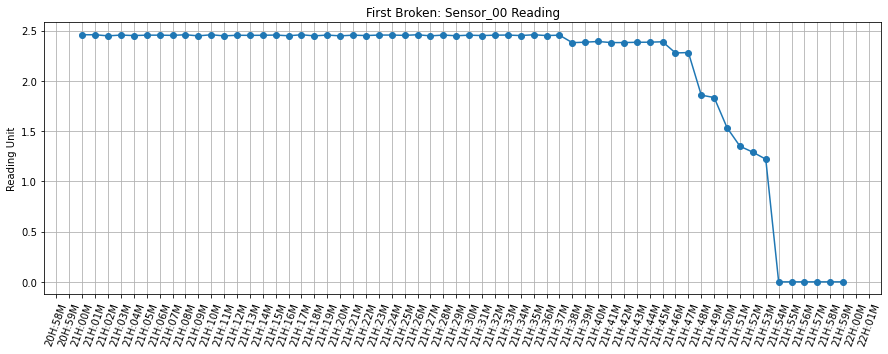

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=70)
ax.plot(data.loc['2018-04-12 21:00:00':'2018-04-12 22:15:00', 'sensor_00'],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('First Broken: Sensor_00 Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MinuteLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'));


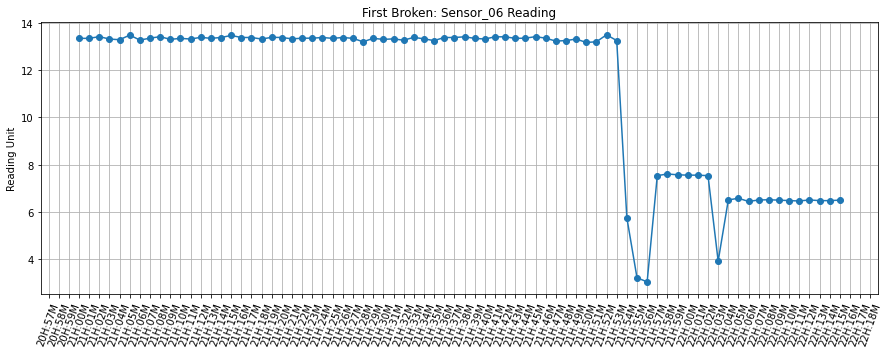

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=70)
ax.plot(data.loc['2018-04-12 21:00:00':'2018-04-12 22:15:00', 'sensor_06'],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('First Broken: Sensor_06 Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MinuteLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'));


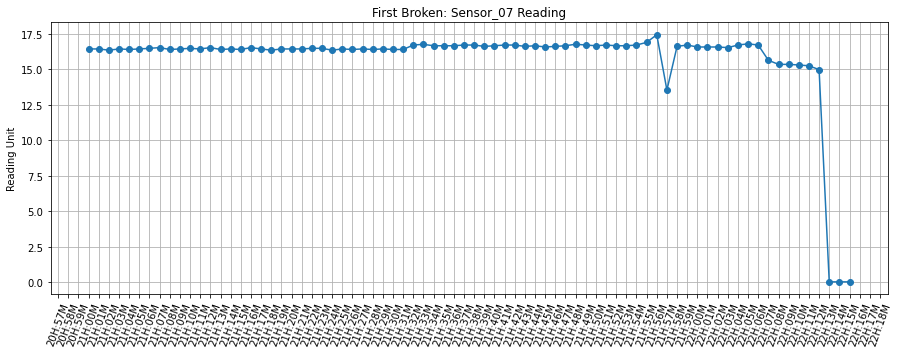

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=70)
ax.plot(data.loc['2018-04-12 21:00:00':'2018-04-12 22:15:00', 'sensor_07'],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('First Broken: Sensor_07 Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MinuteLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'));


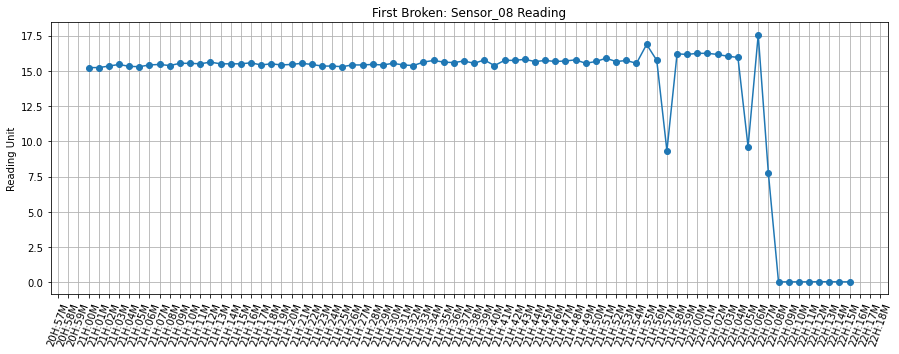

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=70)
ax.plot(data.loc['2018-04-12 21:00:00':'2018-04-12 22:15:00', 'sensor_08'],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('First Broken: Sensor_08 Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MinuteLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'));

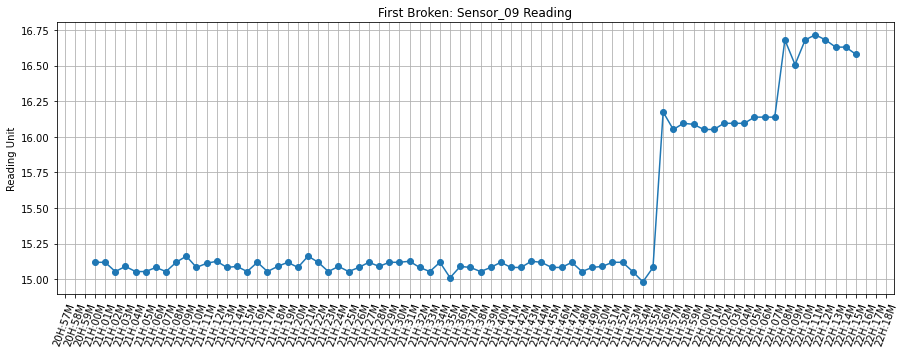

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=70)
ax.plot(data.loc['2018-04-12 21:00:00':'2018-04-12 22:15:00', 'sensor_09'],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('First Broken: Sensor_09 Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MinuteLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'));


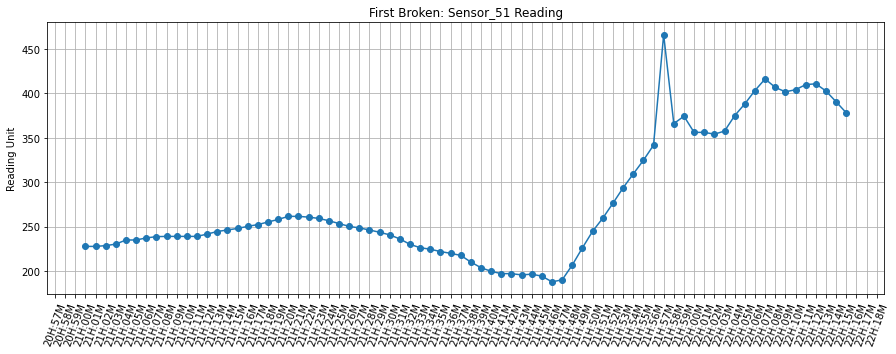

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=70)
ax.plot(data.loc['2018-04-12 21:00:00':'2018-04-12 22:15:00', 'sensor_51'],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('First Broken: Sensor_51 Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MinuteLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'));


The sensors which have many null values in  'recovering' class show a sudden change when a failure occurs, which means that they may be sensors which are  heavily dependent on the system

In [28]:
#Getting the list of columns
cols = list(data.columns)

In [29]:
#Removing sensor 15 as it is completely null
cols.remove('sensor_15')

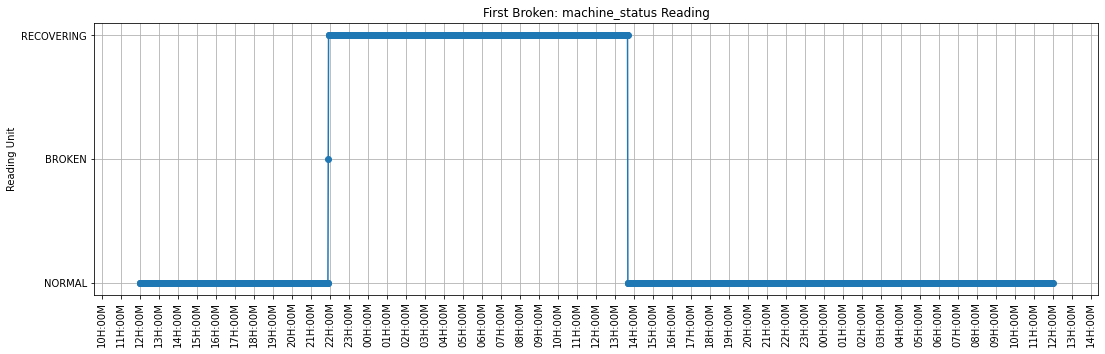

In [82]:
#for i in cols:
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-04-12 12:00:00':'2018-04-14 12:00:00', i],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('First Broken: {0} Reading'.format(i))
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))

> **First Broken:** To get back to normal state, it took around 16 hours

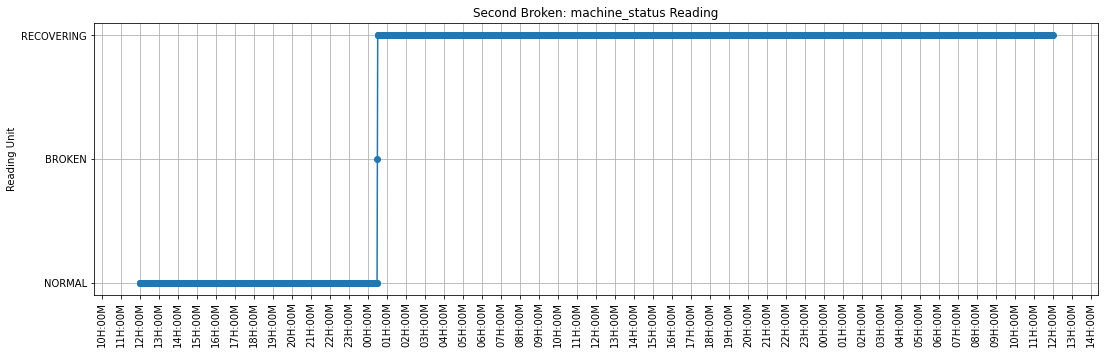

In [78]:
# for i in cols:
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-04-17 12:00:00':'2018-04-19 12:00:00', i],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('Second Broken: {0} Reading'.format(i))
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))

> **Second Broken:** Even after plotting for more than 24 hours, it has still not recovered

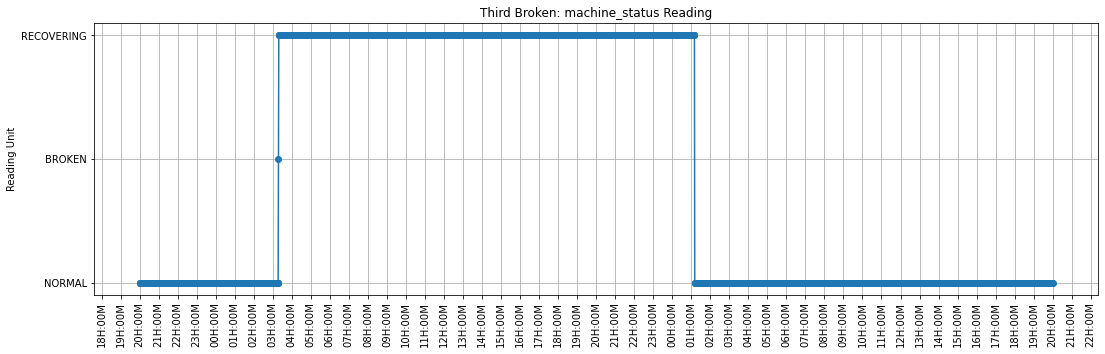

In [46]:
# for i in cols:
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-05-18 20:00:00':'2018-05-20 20:00:00', i],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('Third Broken: {0} Reading'.format(i))
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))

> **Third Broken:** To get back to normal state, it took around 22 hours

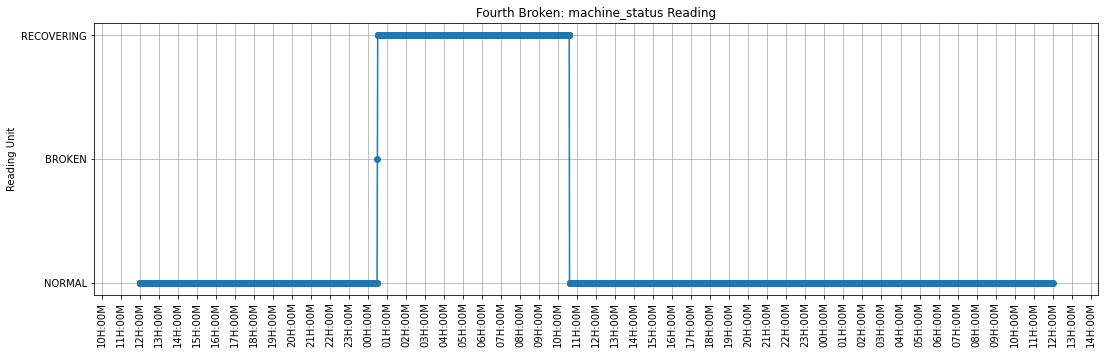

In [45]:
# for i in cols:
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-05-24 12:00:00':'2018-05-26 12:00:00', i],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('Fourth Broken: {0} Reading'.format(i))
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))

> **Fourth Broken:** To get back to normal state, it took around 10 hours

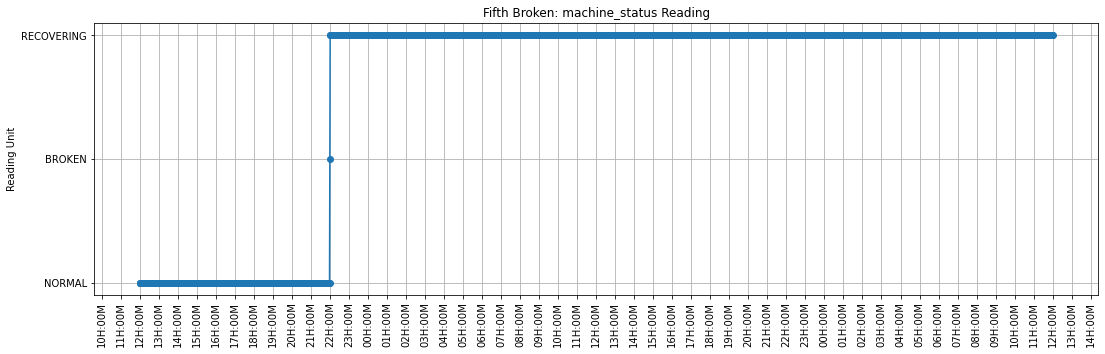

In [44]:
# for i in cols:
#     if i == 'sensor_51':
#         continue
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-06-28 12:00:00':'2018-06-30 12:00:00', i],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('Fifth Broken: {0} Reading'.format(i))
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))

Skipping sensor_51 as it is completely null for this broken state

> **Fifth Broken:** Even after plotting for more than 24 hours, it has still not recovered

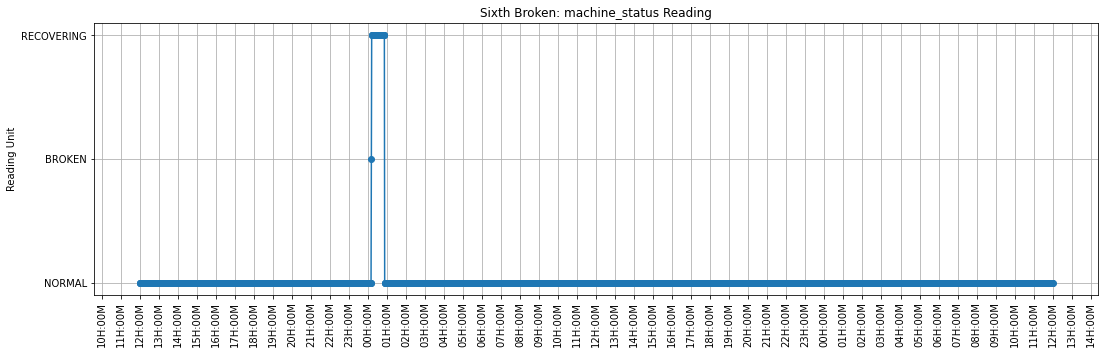

In [43]:
# for i in cols:
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-07-07 12:00:00':'2018-07-09 12:00:00', i],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('Sixth Broken: {0} Reading'.format(i))
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))

> **Sixth Broken**: To get back to normal state, it took around 1 hour

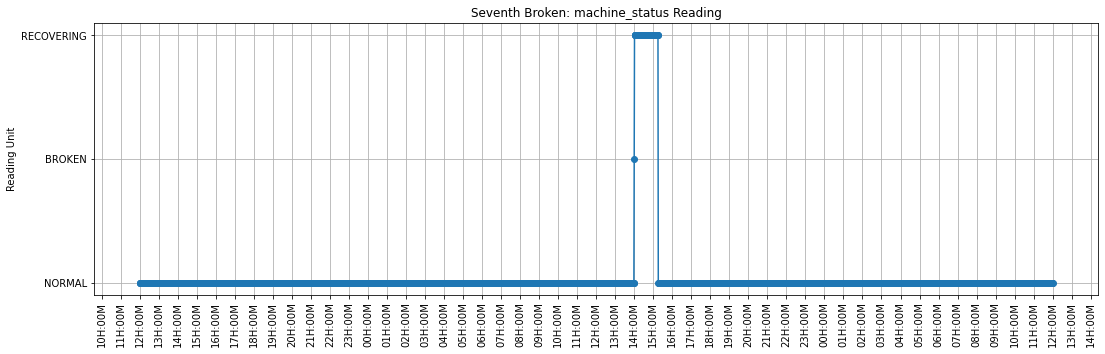

In [42]:
# for i in cols:
#     if i == 'sensor_50':
#         continue
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-07-24 12:00:00':'2018-07-26 12:00:00', i],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('Seventh Broken: {0} Reading'.format(i))
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))

Skipping sensor_50 as it is completely null for this broken even

> **Seventh Broken**: To get back to normal state, it took around 1 hour

> Plotting second and fifth broken event, once again with more window to see how much time it takes to recover

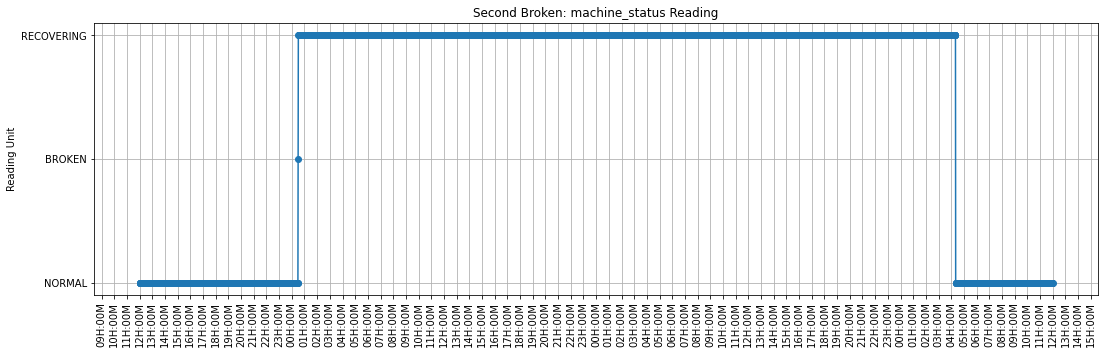

In [38]:
fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-04-17 12:00:00':'2018-04-20 12:00:00', 'machine_status'],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('Second Broken: machine_status Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%HH:%MM'))

**Second Broken**: To get back to normal state, it took around 52 hours

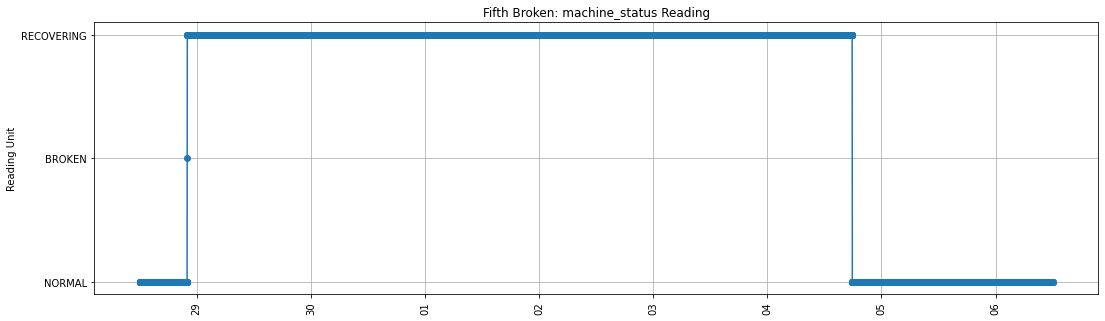

In [39]:

fig, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
ax.plot(data.loc['2018-06-28 12:00:00':'2018-07-06 12:00:00', 'machine_status'],marker='o', linestyle='-')
plt.grid(True) 
ax.set_ylabel('Reading Unit')
ax.set_title('Fifth Broken: machine_status Reading')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.DayLocator())
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))

> **Fifth Broken**: To get back to normal state, it took almost 6 days, this is the largest broken state in the dataset